# Setup

In [1]:
# Imports
import pandas as pd
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize, TweetTokenizer, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
import string
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
!pip install unidecode
from unidecode import unidecode
# pip install Counter
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import MiniBatchKMeans
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.cm as cm


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
     |████████████████████████████████| 235 kB 10.7 MB/s 


In [2]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Unzip files to memory
!unzip -q -o /content/drive/MyDrive/DS_5230_Final_Project/Data/UkraineCombinedTweetsDeduped_FEB27.csv.gzip.zip
!unzip -q -o /content/drive/MyDrive/DS_5230_Final_Project/Data/UkraineCombinedTweetsDeduped_FEB28_part1.csv.gzip.zip
!unzip -q -o /content/drive/MyDrive/DS_5230_Final_Project/Data/UkraineCombinedTweetsDeduped_FEB28_part2.csv.gzip.zip
!unzip -q -o /content/drive/MyDrive/DS_5230_Final_Project/Data/UkraineCombinedTweetsDeduped_MAR01.csv.gzip.zip
!unzip -q -o /content/drive/MyDrive/DS_5230_Final_Project/Data/UkraineCombinedTweetsDeduped_MAR02.csv.gzip.zip
!unzip -q -o /content/drive/MyDrive/DS_5230_Final_Project/Data/UkraineCombinedTweetsDeduped_MAR03.csv.gzip.zip
!unzip -q -o /content/drive/MyDrive/DS_5230_Final_Project/Data/UkraineCombinedTweetsDeduped_MAR04.csv.gzip.zip
!unzip -q -o /content/drive/MyDrive/DS_5230_Final_Project/Data/UkraineCombinedTweetsDeduped_MAR05.csv.gzip.zip

In [4]:
# Decompress files and concatenate to datframe

filenames = ['UkraineCombinedTweetsDeduped_FEB27.csv.gzip',
             'UkraineCombinedTweetsDeduped_FEB28_part1.csv.gzip',
             'UkraineCombinedTweetsDeduped_FEB28_part2.csv.gzip',
             'UkraineCombinedTweetsDeduped_MAR01.csv.gzip',
             'UkraineCombinedTweetsDeduped_MAR02.csv.gzip',
             'UkraineCombinedTweetsDeduped_MAR03.csv.gzip',
             'UkraineCombinedTweetsDeduped_MAR04.csv.gzip',
             'UkraineCombinedTweetsDeduped_MAR05.csv.gzip']
  
li = []

for filename in filenames:
    df = pd.read_csv('/content/' + filename, 
                     index_col=None, 
                     header=0,
                     compression='gzip')
    li.append(df)

data = pd.concat(li, axis=0, ignore_index=True)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# Cleaning & Tokenizing

In [5]:
n = 10000

In [6]:
data.shape

(2984341, 18)

In [7]:
hashtags = ['#SlavaUkraini','#Russia','#RussiaUkraineWar','#Putin','#RussiaUkraine', '#RussianWar', '#ww3', '#moscow', '#RussianConflict', '#ukraineunderattack', '#Ukriane', '#Ukraine', '#RussianUkrainianWar', '#UkraineRussia', '#UkraineConflict', '#UkraineWar', '#Kharkiv', '#StopPutinNow']

In [8]:
# Define function to clean text (to lowercase, remove punctuation, extra whitespace)
def clean_text(text):
    text_nonum = re.sub(r'\d+', '', text)
    text_nopunct = "".join([char.lower() for char in text_nonum if char not in '!"$%&\'()*+,-./:;<=>?[\]^_`{|}~']) 
    text_no_doublespace = re.sub('\s+', ' ', text_nopunct).strip()
    
    return text_no_doublespace

# Define function to determine if a token is junk (@'s, URLs, stopwords)
def is_junk(token):
  if ('https' in token) or ('@' in token) or (len(token) <= 2) or (token in hashtags):
    return False
  else:
    return True

# Define function to drop unwanted tokens
def drop_tokens(tokens):
  return list(filter(lambda token: is_junk(token), tokens))

# Lemmatize words to get each word to its root
def lemmatize_words(words):
  lemmatizer = WordNetLemmatizer()
  lem_words = [lemmatizer.lemmatize(w, 'v') for w in words]
  lem_words = [lemmatizer.lemmatize(w) for w in lem_words]
  return lem_words

In [9]:
# Remove any tweets not in English
data = data.loc[data['language'] == 'en']
data.shape

(1961759, 18)

In [10]:
# Clean text
data.text = data.text.apply(clean_text)

# Tokenize text
tt = TweetTokenizer()
tokenized_text = data.text.apply(tt.tokenize)

In [11]:
# Drop bad tokens
tokenized_text = tokenized_text.apply(drop_tokens)

In [12]:
# Apply lemmetization
tokenized_text = tokenized_text.apply(lemmatize_words)

In [13]:
tokenized_text

0          [#ukrainerussiawar, capture, russian, soldier,...
1          [like, everybody, else, root, for, ukraine, fi...
3          [elect, game, show, host, and, get, clown, #uk...
4          [ukrainian, soldier, wear, sunflower, their, h...
5          [russian, troop, destroy, commercial, oil, bas...
                                 ...                        
2984335    [#putin, will, not, stop, with, #ukraine, do, ...
2984336    [#ukraine, need, weapon, and, humanitarian, as...
2984337    [visa, suspend, all, operation, russia, all, c...
2984338    [#ukraine, one, the, first, glimpse, ppzr, pio...
2984340    [forget, include, the, tag, the, earlier, publ...
Name: text, Length: 1961759, dtype: object

In [ ]:
type(tokenized_text)

# EDA

In [ ]:
# Description of data
data.describe()

,Unnamed: 0,userid,following,followers,totaltweets,tweetid,retweetcount,favorite_count
count,1.961759e+06,1.961759e+06,1.961759e+06,1.961759e+06,1.961759e+06,1.961759e+06,1.961759e+06,1.961759e+06
mean,1.270606e+06,6.586152e+17,1.618424e+03,1.114804e+04,4.509341e+04,1.499109e+18,1.230423e+03,3.589590e-01
std,6.287485e+05,6.433550e+17,6.178702e+03,2.557078e+05,1.188470e+05,7.446281e+14,7.484569e+03,7.481169e+01
min,0.000000e+00,2.210000e+02,0.000000e+00,0.000000e+00,0.000000e+00,1.497725e+18,0.000000e+00,0.000000e+00
25%,7.928005e+05,4.844722e+08,1.010000e+02,3.100000e+01,7.900000e+02,1.498475e+18,1.000000e+00,0.000000e+00
50%,1.341832e+06,7.885091e+17,4.500000e+02,2.370000e+02,7.023000e+03,1.499154e+18,2.800000e+01,0.000000e+00
75%,1.712714e+06,1.328872e+18,1.546000e+03,1.178000e+03,3.659300e+04,1.499781e+18,3.190000e+02,0.000000e+00
max,2.405426e+06,1.500258e+18,1.422017e+06,5.201331e+07,4.019692e+06,1.500259e+18,1.468680e+05,4.271000e+04


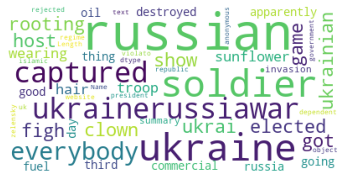

In [ ]:
# WordCloud
wordcloud = WordCloud(background_color = 'white',
                      max_words = 500,
                      max_font_size = 60,
                      random_state = 42
                      ).generate(str(tokenized_text))
print(wordcloud)
plt.imshow(wordcloud)
plt.axis('off')
plt.rcParams["figure.figsize"] = [5,5]
plt.show()

In [ ]:
# Function to find most popular hashtags
def find_hashtags(tweets):
  lst = []
  tweet = eval(str(tweets))
  for i in tweet:
    lst.append((str(unidecode(i['text'])).lower()))
    lst = list(set(lst))
  return lst

In [ ]:
# Make list of most popular hashtags
hashtags_drop = ['SlavaUkraini','Russia','RussiaUkraineWar','Putin','RussiaUkraine', 'RussianWar', 'ww3', 'moscow', 'RussianConflict', 'ukraineunderattack', 'Ukriane', 'Ukraine', 'RussianUkrainianWar', 'UkraineRussia', 'UkraineConflict', 'UkraineWar', 'Kharkiv', 'StopPutinNow']
hashtags_drop = [x.lower() for x in hashtags_drop]
hashtags = []
hashtag_list = data['hashtags'].apply(find_hashtags)

for hashtag in hashtag_list:
  for h in hashtag:
    if h not in hashtags_drop:
      hashtags.append(h)

In [ ]:
# Make a dataframe of top 25 hashtags
top_hashtags = 25
count = Counter(hashtags)
top_hashtags_lst = count.most_common(top_hashtags)

hashtags_df = pd.DataFrame(top_hashtags_lst)
hashtags_df.columns = ['Hashtags', 'Tweets']
# hashtags_df 

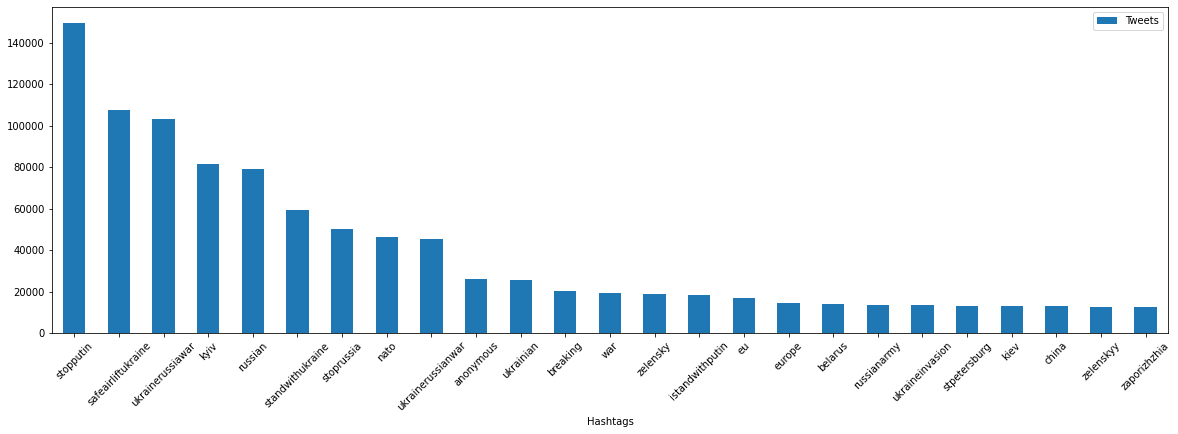

In [ ]:
# Plot top 25 most used hashtags
plt.rcParams["figure.figsize"] = [20,6]
hashtags_df.plot.bar(x='Hashtags', y='Tweets', rot=45)

# Clustering

In [14]:
# Updated TF-IDF of tokenized words

# Function that takes tokenized lists and returns them as a string for vectorizer 
def identity_tokenizer(text):
  return text

vectorizer = TfidfVectorizer(tokenizer=identity_tokenizer, 
                             stop_words=stopwords.words('english'),
                             lowercase=False,
                             max_features=1000)
X = vectorizer.fit_transform(tokenized_text)
print(vectorizer.get_feature_names_out()) # subset of 10000

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'", 'b', 'c', 'e', 'f', 'g', 'h', 'j', 'l', 'n', 'p', 'r', 'u', 'v', 'w'] not in stop_words.
  % sorted(inconsistent)


['#anonymous' '#belarus' '#biden' '#breaking' '#chernihiv' '#china'
 '#closethesky' '#eu' '#europe' '#fckputin' '#freeukraine' '#germany'
 '#helpukraine' '#india' '#israel' '#istandwithputin' '#istandwithrussia'
 '#istandwithukraine' '#kharkiv' '#kharkov' '#kherson' '#kiev' '#kyiv'
 '#mariupol' '#nato' '#nft' '#nfts' '#noflyzone' '#noflyzoneoverukraine'
 '#nowar' '#nuclear' '#nuclearwar' '#operationganga' '#opkremlin'
 '#oprussia' '#palestine' '#peace' '#poland' '#protectuаsky' '#protest'
 '#putin' '#putinhitler' '#putinisawarcriminal' '#putins' '#putinswar'
 '#putinwarcrimes' '#putinwarcriminal' '#racism' '#russia'
 '#russiainvadedukraine' '#russian' '#russianarmy' '#russianinvasion'
 '#russians' '#russianukrainianwar' '#russias' '#russiaukraine'
 '#russiaukraineconflict' '#russiaukrainecrisis' '#russiaukrainewar'
 '#safeairliftukraine' '#sanctions' '#slavaukraini' '#sotu'
 '#standingwithukraine' '#standtogether' '#standwithukraine'
 '#standwithukriane' '#stopputin' '#stopputinnow' '#

In [ ]:
X.shape

(1961759, 1000)

Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters


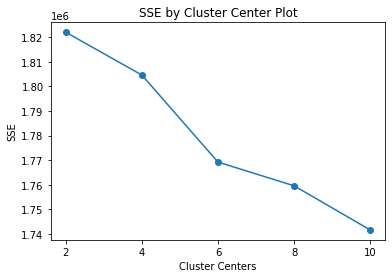

In [15]:
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(X, 10)

In [16]:
clusters = MiniBatchKMeans(n_clusters=3, init_size=1024, batch_size=2048, random_state=20).fit_predict(X)

In [ ]:
from sklearn.metrics import silhouette_score

s = silhouette_score(X, clusters, metric='euclidean')
s

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


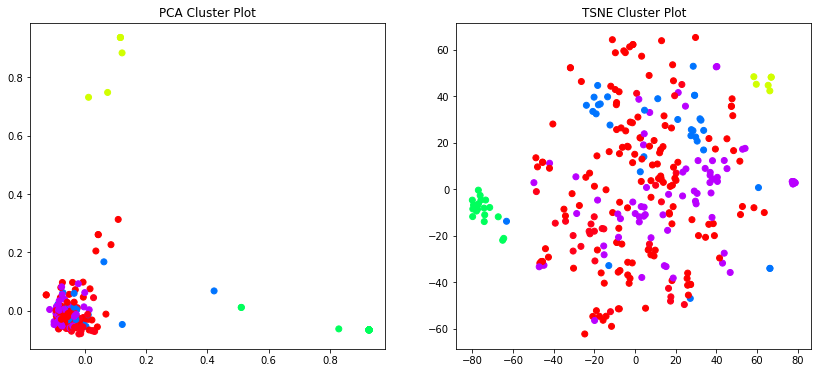

In [ ]:
# PCA and TSNE Plots
def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=3000, replace=False)
    
    # pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=300, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    
plot_tsne_pca(X, clusters)

Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters


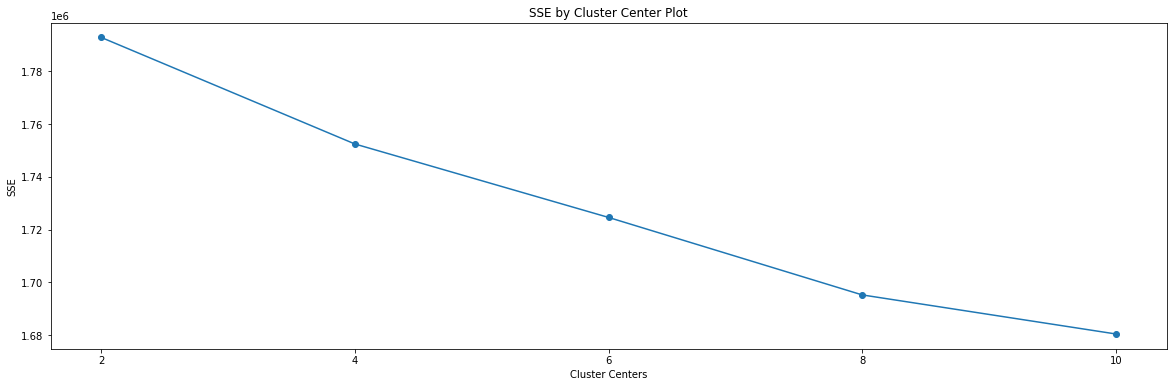

In [ ]:
from sklearn.cluster import MiniBatchKMeans

def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(X_2, 10)

In [ ]:
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))

In [ ]:
# get_top_keywords(X, clusters, vectorizer.get_feature_names(), 10)

In [ ]:
print(len(clusters[clusters == 0]))
print(len(clusters[clusters == 1]))
print(len(clusters[clusters == 2]))
print(len(clusters[clusters == 3]))
print(len(clusters[clusters == 4]))
print(len(clusters[clusters == 5]))

901850
38310
103700
231229
506974
179696


In [ ]:
df = pd.DataFrame(X)

In [ ]:
test = X.toarray()

In [ ]:
df = df.groupby(clusters).mean()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
labels = vectorizer.get_feature_names_out()
n_terms = 10

for i,r in df.iterrows():
  print('\nCluster {}'.format(i))
  print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))


Cluster 0


Cluster 1


Cluster 2


Cluster 3



# Model Evaluation